### Data Collection and Preprocessing

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# Normalize the image data to the range 0-1
x_train = x_train.astype('float32')/ 255.0
x_test = x_test.astype('float32')/255.0

In [5]:
#Flatten the image (28x28 -> 784)
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

In [6]:
#One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Model Building

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [11]:
# Build the ANN model
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [12]:
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model Training

In [14]:
#Train the Model
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)


Epoch 1/20
375/375 [==============================] - 7s 15ms/step - loss: 0.2761 - accuracy: 0.9171 - val_loss: 0.1219 - val_accuracy: 0.9623
Epoch 2/20
375/375 [==============================] - 5s 15ms/step - loss: 0.1112 - accuracy: 0.9658 - val_loss: 0.0929 - val_accuracy: 0.9718
Epoch 3/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0784 - accuracy: 0.9751 - val_loss: 0.0865 - val_accuracy: 0.9734
Epoch 4/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0574 - accuracy: 0.9811 - val_loss: 0.0774 - val_accuracy: 0.9775
Epoch 5/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0463 - accuracy: 0.9849 - val_loss: 0.0807 - val_accuracy: 0.9779
Epoch 6/20
375/375 [==============================] - 5s 15ms/step - loss: 0.0379 - accuracy: 0.9879 - val_loss: 0.0854 - val_accuracy: 0.9776
Epoch 7/20
375/375 [==============================] - 5s 15ms/step - loss: 0.0329 - accuracy: 0.9894 - val_loss: 0.0847 - val_accuracy: 0.9759

### Model Evaluation

In [15]:
import matplotlib.pyplot as plt

In [16]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy : {test_acc: .4f}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0921 - accuracy: 0.9813
Test accuracy :  0.9813


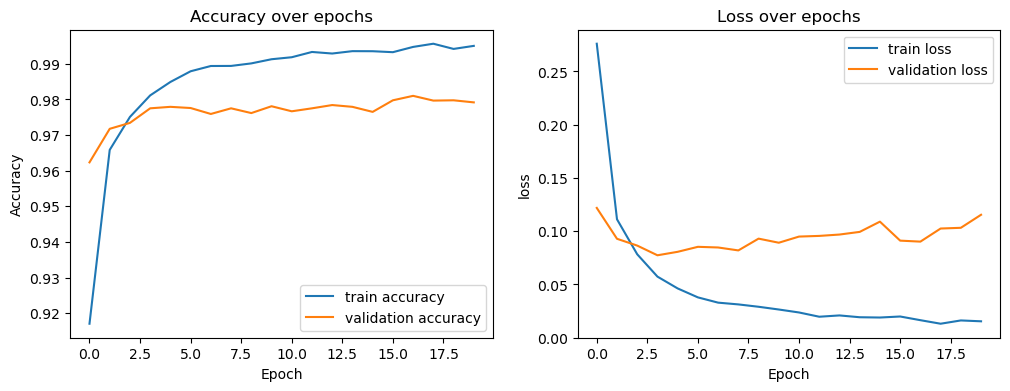

In [18]:
#Plot accuracy and loss over epochs
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over epochs')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.title('Loss over epochs')

plt.show()

### Model deployment

In [19]:
#save the model
model.save('mnist_ann_model.h5')

C:\Users\Bhupendra Singh\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
#Load model for inference
loaded_model = tf.keras.models.load_model('mnist_ann_model.h5')

In [21]:
# Make Predictions
import numpy as np

In [22]:
predictions = loaded_model.predict(x_test)
predicted_classes = np.argmax(predictions, axis = 1)

313/313 [==============================] - 2s 4ms/step


In [23]:
# Compare with true labels
true_classes = np.argmax(y_test, axis = 1)

In [24]:
# Print some predictions
for i in range(10):
    print(f'True label : {true_classes[i]}, Predicted label: {predicted_classes[i]}')

True label : 7, Predicted label: 7
True label : 2, Predicted label: 2
True label : 1, Predicted label: 1
True label : 0, Predicted label: 0
True label : 4, Predicted label: 4
True label : 1, Predicted label: 1
True label : 4, Predicted label: 4
True label : 9, Predicted label: 9
True label : 5, Predicted label: 6
True label : 9, Predicted label: 9
